# Sampling distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pareto, uniform, norm, t, ttest_ind, ks_2samp, sem, bootstrap
%matplotlib inline

# PDF

In [2]:
pts = np.linspace(-3, 3, 100)
pts

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

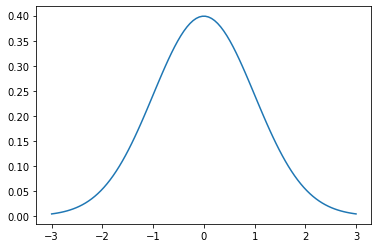

In [3]:
sns.lineplot(pts, norm().pdf(pts))

# CDF

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

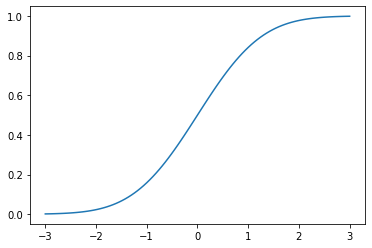

In [4]:
sns.lineplot(pts, norm().cdf(pts))

(4.978848190793135, 5.0179251434527465)

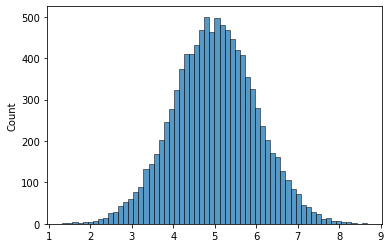

In [5]:
sample_pts = norm(5, 1).rvs(size=10000)
sample_error = sem(sample_pts)
confidence_interval = norm.interval(0.95, loc=sample_pts.mean(), scale=sample_error)
sns.histplot(sample_pts)
confidence_interval


In [6]:
z_table_lookup = norm.ppf((1 + .95) / 2)
z_table_lookup

1.959963984540054

In [7]:
sample_error = sem(sample_pts)
mean = sample_pts.mean()
(mean - z_table_lookup * sample_error, mean + z_table_lookup * sample_error)

(4.978848190793135, 5.0179251434527465)

## Bootstrap sampling

In [8]:
bootstrap((sample_pts,), np.mean, confidence_level=0.95, n_resamples=100, method='percentile' )

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.982015331439558, high=5.019532886870777), standard_error=0.010401266573926387)

### The hard way

In [10]:
import random
sample_pts_list = sample_pts.tolist()

n_bootstraps = 1000
# sample without replace
bootstrap_means = [np.mean(random.choices(sample_pts_list, k=len(sample_pts_list))) for _ in range(n_bootstraps)]
bootstrap_means = sorted(bootstrap_means)
bootstrap_means[int(0.025 * len(bootstrap_means))], bootstrap_means[int(0.975 * len(bootstrap_means))]

(4.980315623013695, 5.018775998590021)

# Sampling normal with uniform

In [11]:
uniform_pts = uniform(-3, 6).rvs(200)

In [12]:
uniform_pts

array([-1.10647446, -0.30012817, -0.19119651,  0.85370775,  2.0123177 ,
        2.78545274, -0.56701093,  1.17248549,  0.68806224, -2.42780368,
        1.91520878, -2.98850977, -2.36387085, -2.74548657, -2.23907589,
        0.10353145, -1.21069695,  0.30860518, -0.8541059 , -1.63560467,
       -0.48690091,  0.64680618,  2.02120033,  1.7976896 ,  0.28394819,
        1.92903416,  0.59336318, -2.75422932, -0.25996075, -2.28555575,
       -0.8654308 , -2.55117991, -1.51872421,  2.92370707, -1.63753674,
        1.82998583, -1.61436227, -1.14069812,  1.68413198, -0.31133715,
       -2.11641971, -1.34219975,  2.60145642,  1.65393313,  1.39745276,
       -1.13930198,  2.06053393, -0.35760612,  0.83151572, -0.36044663,
       -2.12569334,  2.90520978, -2.06748404, -2.94503049,  0.90836153,
        0.162689  , -1.15805249, -2.22742252, -0.81218934, -0.83101412,
        2.49109224,  1.89733018,  2.89072215, -2.16574521,  0.36118517,
        0.61163816, -0.72951586,  1.76339525,  1.70253093,  1.94

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

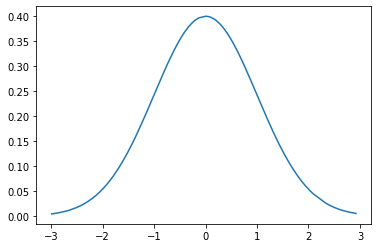

In [13]:
sns.lineplot(uniform_pts, norm().pdf(uniform_pts))

### Aside proving the Central Limit Theorem

In [14]:
sample_size = 1000
num_samples = 100
lots_of_uniform_samples = uniform(-40, 80).rvs((num_samples, sample_size))

In [15]:
lots_of_uniform_samples

array([[ -2.44585413,  -2.13648112,  20.69604368, ...,   2.30430602,
         19.90242434,  33.12742957],
       [-23.46899877,  23.11097173,  24.54177637, ...,  26.66201074,
        -34.88078265,  31.5787436 ],
       [-21.95232437,   1.77865427, -21.17757215, ..., -23.12374952,
         24.31158224, -25.00084166],
       ...,
       [ 39.66710325,  22.86497685,  22.02853586, ...,  26.7804335 ,
         33.67114752,  14.90926049],
       [-29.32955386,  32.33140259,  30.2362273 , ...,  -7.48924896,
        -24.95765722, -32.46829747],
       [-36.90005741, -13.6398792 ,   3.22768418, ...,  33.41149566,
          6.22808885,  -9.35586358]])

In [16]:
means_samples = lots_of_uniform_samples.mean(axis=0)
means_samples

array([-1.63821407e+00, -4.84452986e-01,  3.43144119e+00,  4.43010121e-01,
        4.32850091e-01,  1.18320557e+00,  3.05915639e+00, -3.64162180e+00,
       -2.13256912e+00, -8.59382513e-01,  1.64236953e+00, -3.48583668e+00,
        2.59995108e+00,  1.96432550e+00,  1.09241475e+00,  6.42100238e-01,
        6.70635826e-01, -5.23978651e+00,  1.81698595e+00,  4.84627641e+00,
        1.43822379e+00,  2.64227242e+00, -5.17176585e+00,  1.63440730e+00,
       -9.45815910e-01,  1.97135490e+00, -2.71285231e+00,  4.21343501e-01,
        3.76774606e+00,  2.36367008e+00,  4.32162293e+00, -1.48138910e-01,
       -2.10200387e+00, -1.48154361e+00, -9.91176746e-01, -2.40905080e+00,
        2.05544058e+00,  9.24527497e-01,  2.12229666e+00, -4.66216267e-01,
        5.50635558e-01, -1.00820151e+00, -4.36851240e-01, -1.32950660e+00,
        1.53919508e+00, -2.02850641e+00, -3.53275765e+00, -2.28027937e+00,
        1.17389388e+00, -2.46436026e+00, -3.49361579e-01, -2.69639939e+00,
       -2.79374921e+00,  

<AxesSubplot:title={'center':'Means of 100 sample(s)'}, ylabel='Count'>

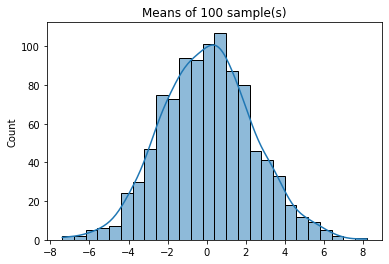

In [17]:
g = sns.histplot(means_samples, kde=True)
g.set_title(f'Means of {num_samples} sample(s)')
g

# Sampling Pareto distribution with normal

In [18]:
normal_pts = norm(2, 1).rvs(100)
normal_pts

array([ 2.41733851,  2.18366455,  3.07274276,  1.01733232,  1.65955294,
        4.62162395,  1.5904147 ,  1.80107905,  1.12184162,  1.71954373,
        2.2637678 ,  2.00756567,  1.67277501, -0.14092239,  1.87557144,
        3.88702409,  1.54549625,  2.17846045,  0.26263458,  0.87916794,
        3.39811422,  2.00785163,  2.94608148,  3.75309694,  3.2301328 ,
        3.07117844,  3.99413454,  2.52955995,  3.04004943,  3.43651906,
        4.07913793,  2.63553762,  1.350234  ,  2.10150102,  3.41264298,
        3.23016254,  2.58579662,  2.08000573,  2.57138094,  1.87033417,
       -0.17962512,  2.50767431, -0.43298957,  2.27601861,  0.93678246,
        1.34115256,  2.05726116,  1.33335275,  1.39717057,  1.49885283,
        1.25996057,  0.65574441,  3.22281779,  2.08309794,  1.65203289,
        1.11696433,  1.92608768,  1.1754733 ,  0.3098817 ,  2.26729451,
        3.47989852,  1.21567084,  1.02595095,  5.42649196,  3.61700087,
        1.18936056,  0.7308116 ,  3.28241272,  3.01788492,  2.94

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

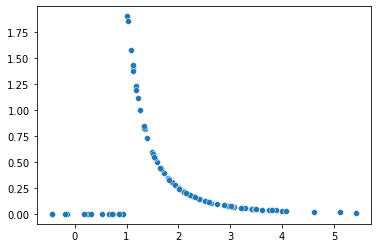

In [19]:
sns.scatterplot(normal_pts, pareto(2).pdf(normal_pts))

# Sampling 2 dimensions

In [20]:
angles = uniform(0, 2 * np.pi).rvs(1000)
angles

array([0.41726931, 4.90891009, 6.06493707, 4.32199493, 1.84123593,
       2.67238928, 1.14222544, 5.31875839, 0.53357561, 0.27623387,
       0.28604552, 2.72561896, 5.53821015, 0.8642117 , 0.58858094,
       0.50610162, 0.73180696, 5.28645548, 2.42518891, 1.36549502,
       1.0075855 , 1.17700325, 5.01818401, 3.47465065, 0.65001392,
       2.41557258, 1.62661613, 1.05601161, 4.25220884, 2.27335872,
       4.46120251, 1.36028914, 3.87213167, 2.88123409, 0.15391362,
       2.26518742, 1.98917977, 1.3391848 , 3.24283628, 4.73125783,
       2.17348688, 6.12157627, 4.29119745, 5.56645161, 6.19928149,
       2.69404093, 3.03912732, 1.79286991, 2.50640534, 2.22906216,
       5.0255779 , 5.58624681, 4.57300014, 0.84088257, 1.87848518,
       0.08753993, 0.86678377, 4.85876563, 2.90189451, 3.83410464,
       1.0209293 , 3.42703389, 5.68697373, 2.14681657, 2.01026684,
       5.3705803 , 4.14830518, 1.76165264, 5.22437461, 1.10229421,
       1.91871399, 3.67637803, 2.57210484, 0.17458116, 5.27423

In [21]:
radii = uniform().rvs(1000)
radii

array([7.62621752e-01, 8.58539316e-01, 9.61421938e-01, 4.15952517e-01,
       2.46398569e-01, 8.62960285e-01, 7.57579591e-01, 8.22788373e-01,
       5.47818995e-01, 6.62014473e-01, 2.22613227e-01, 2.56041791e-01,
       1.51747964e-01, 7.07885075e-02, 1.33970442e-01, 3.57945800e-01,
       1.42621063e-01, 6.09046527e-01, 4.80990017e-02, 7.44482545e-01,
       6.04772393e-01, 5.41694142e-01, 2.41258548e-02, 9.24684231e-01,
       3.18841072e-01, 9.67154033e-01, 5.56096977e-01, 3.58928489e-01,
       6.80156504e-03, 8.67449109e-01, 5.74507204e-01, 5.09493608e-01,
       2.22201448e-01, 8.99592401e-01, 6.09139628e-01, 7.30199260e-01,
       2.60057538e-01, 4.80519890e-02, 9.13154395e-01, 7.81757447e-01,
       1.15484600e-01, 1.38612949e-01, 3.26936108e-01, 1.48521936e-01,
       2.23600473e-01, 4.70751825e-01, 5.44629002e-01, 5.33664190e-01,
       6.23083289e-01, 7.80500622e-01, 1.15705951e-01, 4.65371767e-01,
       6.20120974e-01, 7.15739759e-01, 1.51892332e-01, 9.00629971e-01,
      

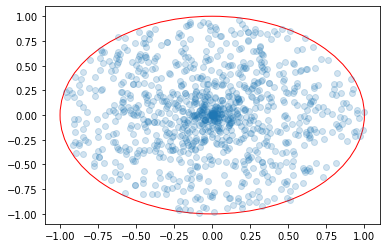

In [22]:
fig, ax = plt.subplots()
ax.plot(radii * np.cos(angles), radii * np.sin(angles), 'o', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# Monte Carlo Sampling

In [23]:
samples = pd.DataFrame(uniform(-1, 2).rvs((1000, 2)), columns=['x', 'y'])
samples

,x,y
0,0.129592,0.077244
1,0.755546,0.039526
2,0.925851,-0.612977
3,0.952126,-0.752685
4,0.067014,0.085683
...,...,...
995,0.179750,0.497726
996,-0.884282,-0.454549
997,0.429605,0.326898
998,0.138998,0.474849


In [24]:
samples['within'] = samples.apply(lambda row: np.sqrt(row[0] ** 2 + row[1] ** 2) <= 1.0, axis=1)
samples

,x,y,within
0,0.129592,0.077244,True
1,0.755546,0.039526,True
2,0.925851,-0.612977,False
3,0.952126,-0.752685,False
4,0.067014,0.085683,True
...,...,...,...
995,0.179750,0.497726,True
996,-0.884282,-0.454549,True
997,0.429605,0.326898,True
998,0.138998,0.474849,True


In [25]:
within_samples = samples[samples['within']]
outside_samples = samples[~samples['within']]

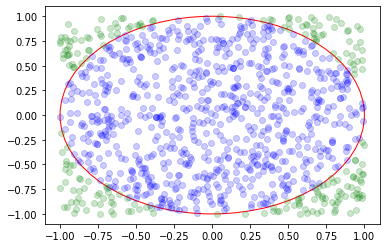

In [26]:
fig, ax = plt.subplots()
ax.plot(within_samples['x'], within_samples['y'], 'o', color='b', alpha=0.2)
ax.plot(outside_samples['x'], outside_samples['y'], 'o', color='g', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# T-test

$$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{\sigma_{1}^{2}}{n_1} + \frac{\sigma_{2}^{2}}{n_2}}}$$

# Playing with values

t-value:  24.56265830389922
Alpha 5.517008259430968e-133
Accept alternative:  True


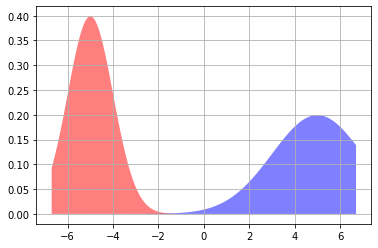

In [27]:
mean = 0
diff = 5
std_diff = 1
std = 1

x = np.linspace(norm.ppf(0.00000000001), norm.ppf(0.99999999999), 100000)

mu_1 = mean - diff
mu_2 = mean + diff

std_1 = std
std_2 = std + std_diff
y1 = norm.pdf(x, mu_1, std_1)
y2 = norm.pdf(x, mu_2, std_2)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)


plt.grid()

t_value, alpha = ttest_ind(y1, y2, equal_var=False)
    
print("t-value: ", t_value)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

KS stat 0.16
Alpha 0.1548386665118475
Accept alternative:  False
KS Test max difference:  27


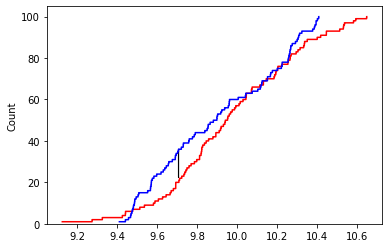

In [28]:
mu = 10
sigma = 0.3 
N = 100

np.random.seed(3)
s = np.random.normal(mu, sigma, N)
#np.random.seed(31)
#s2 = np.random.normal(mu, sigma, N)
s2 = np.random.uniform(9.41, 10.43, 100)

nbins = 10000

hist1, bin_edges1 = np.histogram(s, nbins)
hist2, bin_edges2 = np.histogram(s2, nbins)
cdf_hist1 = np.cumsum(hist1)
cdf_hist2 = np.cumsum(hist2)

diff = np.abs(cdf_hist1 - cdf_hist2)
max_diff = max(diff)
argmax_diff = np.argmax(diff)


g1 = sns.histplot(s, bins=nbins, cumulative=True, element='step', color='red', fill=False)
g2 = sns.histplot(s2, bins=nbins, cumulative=True, element='step', color='blue', fill=False)

if cdf_hist1[argmax_diff] > cdf_hist2[argmax_diff]:
    g1.axes.arrow(bin_edges1[argmax_diff], cdf_hist1[argmax_diff], 0, max_diff / 2, length_includes_head=True, color='black')
else:
    g2.axes.arrow(bin_edges2[argmax_diff], cdf_hist2[argmax_diff], 0, -max_diff / 2, length_includes_head=True, color='black')

ks_stat, alpha = ks_2samp(s, s2)
print("KS stat", ks_stat)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

print("KS Test max difference: ", max_diff)

# Permutation testing

In [29]:
s = s.tolist()
s2 = s2.tolist()

avg_s = np.mean(s)
avg_s2 = np.mean(s2)
combined = s + s2

n_permuations = int(1e4)
permutations = []
for i in range(n_permuations):
    new_combined = random.shuffle(combined)
    new_s_mean = np.mean(combined[:len(s)])
    new_s2_mean = np.mean(combined[len(s):])
    permutations.append(new_s_mean - new_s2_mean)

(array([  34.,  170.,  560., 1442., 2357., 2630., 1747.,  799.,  218.,
          43.]),
 array([-0.15348615, -0.12359617, -0.09370619, -0.06381621, -0.03392623,
        -0.00403625,  0.02585373,  0.05574371,  0.08563369,  0.11552367,
         0.14541364]),
 <BarContainer object of 10 artists>)

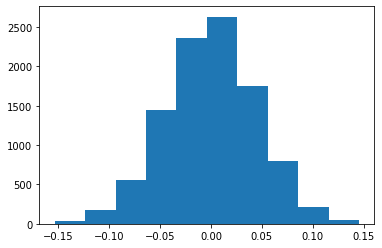

In [30]:
plt.hist(permutations)

In [31]:
avg_s - avg_s2

0.06563313063194265

In [32]:
permutations

[0.06297100468014705,
 -0.04516258374843396,
 -0.02822328711919475,
 -0.07860362415173228,
 -0.026937477994726677,
 -0.01021712468000402,
 0.047063756521579236,
 -0.011958486076665054,
 0.011150829128473205,
 -0.031781626701633314,
 -0.05706003929151038,
 -0.02474706702235885,
 0.02386094440949016,
 0.008547224806688902,
 -0.00910367792927147,
 -0.03712318489815658,
 0.057248139980371704,
 -0.01901854303342887,
 0.026493504943179147,
 -0.08749228382605168,
 -0.0174858764314596,
 0.011868243071358364,
 0.05158656037888498,
 0.049878143016336196,
 0.013933537776189553,
 0.017505513557736663,
 0.009084590073911158,
 0.011880528372593346,
 0.020418275491659088,
 -0.03827223944806768,
 -0.012877905472443274,
 0.07183076557540247,
 -0.08235983536501656,
 0.020565036127566216,
 0.06945778711022044,
 -0.051725388809138906,
 0.05779304067499069,
 -0.05575524495965034,
 -0.002972158468010022,
 0.01686715727062449,
 0.07328797775169704,
 0.03888147357854521,
 -0.007982968747690222,
 -0.0366965998

In [33]:
gt_avg = len([i for i in permutations if i > avg_s - avg_s2])
gt_avg

695

In [34]:
p_value = gt_avg / len(permutations)
p_value

0.0695